In [1]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()
import panel as pn
import panel.widgets as pnw
pn.extension()
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector
import pandas as pd
from mesa.time import BaseScheduler

Loading BokehJS ...

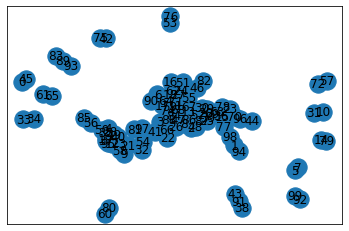

In [3]:
while True:  
    s=[]
    while len(s)<100:
        nextval = int(nx.utils.powerlaw_sequence(1, 2.5)[0]) #100 nodes, power-law exponent 2.5
        if nextval!=0:
            s.append(nextval)
    if sum(s)%2 == 0:
        break
G = nx.configuration_model(s)
G=nx.Graph(G) # remove parallel edges
G.remove_edges_from(nx.selfloop_edges(G))

#draw and show graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

In [3]:
from networkx.utils import powerlaw_sequence

In [7]:
import powerlaw

In [12]:
arr = [1,3,5,6,7,1,23,51,23]
results=powerlaw.Fit(arr)

Calculating best minimal value for power law fit


In [13]:
results.truncated_power_law.parameter1 # power law  parameter (alpha)
results.truncated_power_law.parameter2 # exponential cut-off parameter (beta)

0.0244311132461124

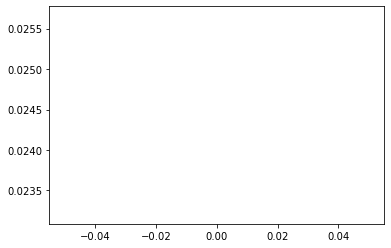

In [14]:
plt.plot(results.truncated_power_law.parameter2)

True
Configuration model
Degree sequence [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
Degree histogram
degree #nodes
   5      1
   3      4
   2      3
   1      3


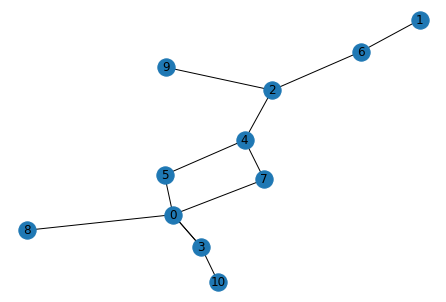

In [6]:

z = [5, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1]
print(nx.is_graphical(z))

print("Configuration model")
G = nx.configuration_model(z)  # configuration model
degree_sequence = [d for n, d in G.degree()]  # degree sequence
print(f"Degree sequence {degree_sequence}")
print("Degree histogram")
hist = {}
for d in degree_sequence:
    if d in hist:
        hist[d] += 1
    else:
        hist[d] = 1
print("degree #nodes")
for d in hist:
    print(f"{d:4} {hist[d]:6}")

nx.draw(G, with_labels=True)
plt.show()

In [40]:
def powerlaw_sequence(n,exponent=2.0):
    """
    Return sample sequence of length n from a power law distribution.
    """
    return [random.paretovariate(exponent-1) for i in range(n)]

In [87]:
z=powerlaw_sequence(5,2)

In [88]:
z

[2.049302162308822,
 3.0915551244076833,
 41.39459826729615,
 1.3285951057505854,
 13.735193396777595]

In [37]:
C = polylog(alpha, math.exp(k / kappa))

1.0404954499577783

In [36]:
def paretovariateq(alpha):
        """Pareto distribution.  alpha is the shape parameter."""
        # Jain, pg. 495

        u = 1.0 - random.random()
        return 1.0 / u ** (1.0 / alpha)

In [125]:
from mpmath import polylog
def powerlawcutoff(alpha,kappa):
    """
    parameter n: number of nodes to be included in the array
    parameter k: degree of a node 
    parameter alpha: shape paramater 
    parameter kappa: cut-off exponent 
    """
    p=random.paretovariate(alpha)
    a = (a*math.exp(a/kappa))/(polylog(alpha, math.exp(-1 / kappa)))       
    return p 

In [119]:
l=powerlawcutoff(2,5)

In [132]:
m=[]
for i in range(6000):
    l=powerlawcutoff(2,5)
    m.append(l)
        

In [136]:
m = np.array(m)
m = m.astype('int64')

In [137]:
from networkx import powerlaw_sequence

ImportError: cannot import name 'powerlaw_sequence' from 'networkx' (C:\Users\Acer\anaconda3\lib\site-packages\networkx\__init__.py)

In [74]:
G.degree()


DegreeView({0: 101, 1: 101, 2: 101, 3: 103, 4: 100, 5: 101, 6: 100, 7: 103, 8: 100, 9: 103, 10: 99, 11: 104, 12: 103, 13: 102, 14: 101, 15: 100, 16: 102, 17: 103, 18: 103, 19: 100, 20: 101, 21: 100, 22: 100, 23: 104, 24: 103, 25: 103, 26: 100, 27: 101, 28: 100, 29: 101, 30: 101, 31: 100, 32: 99, 33: 101, 34: 102, 35: 99, 36: 101, 37: 102, 38: 102, 39: 99, 40: 100, 41: 101, 42: 102, 43: 102, 44: 100, 45: 99, 46: 99, 47: 102, 48: 100, 49: 103, 50: 103, 51: 99, 52: 103, 53: 100, 54: 102, 55: 103, 56: 100, 57: 102, 58: 99, 59: 102, 60: 102, 61: 101, 62: 102, 63: 102, 64: 101, 65: 103, 66: 99, 67: 99, 68: 100, 69: 103, 70: 101, 71: 101, 72: 102, 73: 100, 74: 99, 75: 99, 76: 103, 77: 100, 78: 101, 79: 101, 80: 99, 81: 100, 82: 100, 83: 101, 84: 100, 85: 100, 86: 99, 87: 100, 88: 99, 89: 101, 90: 101, 91: 100, 92: 100, 93: 100, 94: 104, 95: 100, 96: 100, 97: 99, 98: 102, 99: 104, 100: 4, 101: 4, 102: 5, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 4, 11

In [61]:
G.degree()

DegreeView({0: 99, 1: 99, 2: 101, 3: 101, 4: 101, 5: 99, 6: 99, 7: 99, 8: 101, 9: 100, 10: 99, 11: 100, 12: 99, 13: 100, 14: 101, 15: 100, 16: 100, 17: 101, 18: 99, 19: 99, 20: 100, 21: 99, 22: 100, 23: 101, 24: 100, 25: 100, 26: 100, 27: 100, 28: 100, 29: 101, 30: 100, 31: 101, 32: 100, 33: 103, 34: 101, 35: 101, 36: 100, 37: 99, 38: 99, 39: 100, 40: 103, 41: 99, 42: 100, 43: 100, 44: 100, 45: 99, 46: 100, 47: 100, 48: 99, 49: 99, 50: 99, 51: 99, 52: 99, 53: 103, 54: 99, 55: 103, 56: 99, 57: 99, 58: 99, 59: 100, 60: 99, 61: 99, 62: 101, 63: 100, 64: 101, 65: 101, 66: 100, 67: 99, 68: 102, 69: 99, 70: 101, 71: 100, 72: 101, 73: 99, 74: 99, 75: 101, 76: 100, 77: 100, 78: 101, 79: 99, 80: 99, 81: 99, 82: 100, 83: 100, 84: 101, 85: 99, 86: 100, 87: 99, 88: 99, 89: 99, 90: 101, 91: 100, 92: 100, 93: 100, 94: 101, 95: 101, 96: 100, 97: 99, 98: 99, 99: 101, 100: 2, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 2, 107: 2, 108: 2, 109: 2, 110: 2, 111: 2, 112: 2, 113: 2, 114: 2, 115: 2, 116: 3, 

In [7]:
alpha =2 #exponent paramter for scale-free 
kappa = 10 #cut-off parameter 
C = polylog(alpha, math.exp(-1.0 / kappa))

In [8]:
C

mpf('1.312189445743345')

In [7]:
import epydemic

In [82]:
def CutoffPowerLaw(n,alpha, kappa):
        '''Create a model function for a powerlaw distribution with exponential cutoff.

        :param alpha: the exponent of the distribution
        :param kappa: the degree cutoff
        :returns: a model function'''
        C = polylog(alpha, math.exp(-1.0 / kappa))
        return [(pow((k + 0.0), -alpha) * math.exp(-(k + 0.0) / kappa)) / C for ]


def gennet(N, p, maxdeg = 100 ):
        '''Generate a random graph with degree distribution described
        by a model function.

        :param N: number of numbers to generate
        :param p: model function
        :param maxdeg: maximum node degree we'll consider (defaults to 100)
        :returns: a network with the given degree distribution'''
        rng = numpy.random.default_rng()
        ns = []
        t = 0
        for i in range(N):
            while True:
                # draw a random degree
                k = rng.integers(1, maxdeg)

                # do we include a node with this degree?
                if rng.random() < p(k):
                    # yes, add it to the sequence; otherwise,
                    # draw again
                    ns.append(k)
                    t += k
                    break

        # the final sequence of degrees has to sum to an even
        # number, as each edge has two endpoints
        # if the sequence is odd, remove an element and draw
        # another from the distribution, repeating until the
        # overall sequence is even
        while t % 2 != 0:
            # pick a node at random
            i = rng.integers(0, len(ns) - 1)

            # remove it from the sequence and from the total
            t -= ns[i]
            del ns[i]

            # choose a new node to replace the one we removed
            while True:
                # draw a new degree from the distribution
                k = rng.integers(1, maxdeg)

                # do we include a node with this degree?
                if rng.random() < p(k):
                    # yes, add it to the sequence; otherwise,
                    # draw again
                    ns.append(k)
                    t += k
                    break

        # populate the network using the configuration
        # model with the given degree distribution
        g = nx.configuration_model(ns,
                                         create_using=nx.Graph())
        return g

In [94]:
p=CutoffPowerLaw(14,10)

In [ ]:
g = gennet(100000, p,100)

In [ ]:
nx.draw(g)

In [92]:
g.degree()

DegreeView({0: 1, 1: 1, 2: 2, 3: 1, 4: 4, 5: 1, 6: 1, 7: 1, 8: 3, 9: 1, 10: 1, 11: 1, 12: 3, 13: 2, 14: 1, 15: 5, 16: 1, 17: 3, 18: 1, 19: 4, 20: 1, 21: 4, 22: 1, 23: 1, 24: 1, 25: 1, 26: 3, 27: 1, 28: 1, 29: 5, 30: 2, 31: 2, 32: 1, 33: 2, 34: 1, 35: 3, 36: 2, 37: 1, 38: 2, 39: 1, 40: 1, 41: 1, 42: 2, 43: 1, 44: 3, 45: 2, 46: 1, 47: 2, 48: 1, 49: 4, 50: 2, 51: 5, 52: 2, 53: 4, 54: 1, 55: 4, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 2, 65: 8, 66: 1, 67: 4, 68: 2, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 2, 75: 1, 76: 1, 77: 3, 78: 1, 79: 1, 80: 1, 81: 1, 82: 3, 83: 1, 84: 3, 85: 3, 86: 1, 87: 3, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 3, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 2})

In [133]:
z=[]
for i in range(2,10): 
    z.append(p(i)*100)

In [134]:
z

[mpf('15.598562306187757'),
 mpf('6.2729612632017648'),
 mpf('3.1927556659697314'),
 mpf('1.8489118676580687'),
 mpf('1.1617810003526186'),
 mpf('0.7723270437665859'),
 mpf('0.53504203124834449'),
 mpf('0.38251934822357903')]

In [123]:
z=np.random.pareto(5,10)*100 
z=np.array(z)
z=z.astype(int)

In [124]:
graph = nx.configuration_model(z)

In [125]:
g = nx.configuration_model(z,create_using=nx.Graph())

In [19]:
h = PowerLawWithCutoffNetwork(g)

In [30]:
import randht

In [183]:
a=np.array(powerlaw_sequence(1000,2))

In [184]:
ml=[]
for i in a: 
    p = i*int(C)*math.e**(1/5)
    ml.append(i)

In [191]:
C = polylog(2, math.e**(-1.0 / 5))

In [178]:
m=[]
for i in range(1,20):
    C = polylog(i, math.e**(-1.0 /20))
    m.append(float(C))

In [188]:
ml=np.array(ml)
ml

array([2.49805996e+00, 5.69792395e+00, 1.84380144e+00, 1.20144097e+00,
       5.46675722e+00, 1.06221772e+00, 2.97652384e+00, 2.40774111e+00,
       1.94483370e+00, 1.23774581e+00, 3.00009322e+00, 2.41315749e+00,
       1.10012608e+01, 1.72894782e+00, 1.25579764e+00, 4.60297462e+00,
       8.13672788e+00, 7.55759691e+00, 1.08251117e+00, 6.89016721e+00,
       3.91219312e+00, 1.06887832e+00, 3.03024186e+00, 1.39169466e+00,
       6.92345045e+00, 1.12939029e+00, 1.30753630e+00, 7.52198756e+00,
       1.64723905e+00, 3.64578654e+00, 1.95005404e+00, 6.10666513e+00,
       1.12270503e+00, 1.22529711e+00, 1.37333410e+00, 8.26288238e+00,
       1.48264036e+00, 1.36066872e+00, 1.31204822e+00, 1.12884130e+00,
       1.51536149e+00, 1.00983866e+00, 2.43658651e+00, 6.06183513e+00,
       1.08856033e+01, 3.21484608e+00, 3.91761969e+00, 1.32446410e+00,
       2.07341675e+00, 1.39116239e+00, 1.48871460e+00, 7.88678543e+01,
       5.65267547e+00, 5.84544040e+00, 1.63701915e+00, 5.91699485e+00,
      

(array([992.,   3.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   1.]),
 array([1.00056924e+00, 1.55384535e+02, 3.09768500e+02, 4.64152465e+02,
        6.18536431e+02, 7.72920396e+02, 9.27304361e+02, 1.08168833e+03,
        1.23607229e+03, 1.39045626e+03, 1.54484022e+03]),
 <a list of 10 Patch objects>)

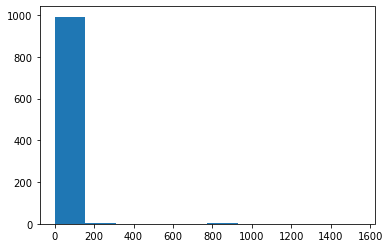

In [190]:
plt.hist(ml)

In [193]:
C=float(C)

In [217]:
cl=[]
for i in range(1,100): 
    ma = ((i**-2)*math.exp(-i/5))/C
    cl.append(ma)


In [251]:
import numpy as np
import scipy.optimize as opt

def distribution(x, alpha, beta, x0):
    return (x + x0)**alpha * np.exp(-beta *x)
x0 = [1,2,3]
sigma = [1 for i in range(99)]

lot, fit = opt.curve_fit(distribution,y,cl,maxfev=1000) # you can pass guess for the parameters/errors
alpha, beta, x0 = fit[0]

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [247]:
len(sigma)

99

In [231]:
len(y)

100

In [232]:
y = np.linspace(1,100,99)

In [263]:

# curvefit

def func(x, alpha, beta, x0):
    return (x + x0)**alpha * np.exp(-beta *x)

popt = opt.curve_fit(func, y, cl, maxfev=1000)
t = np.linspace(1, 3600 * 24 * 28, 13)
plt.plot(t, func(t, *popt), label="Fitted Curve")
plt.legend(loc='upper left')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [265]:
g = nx.configuration_model(cl)

NetworkXError: Invalid degree sequence: sum of degrees must be even, not odd